![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Customer Analysis Round 6
##### Isidre Munné-Bertran

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.

### Get the data

We are using the `marketing_customer_analysis.csv` file.

### Dealing with the data

Already done in the round 2.

### Explore the data

Done in the round 3.

### Processing Data

(_Further processing..._)

- X-y split. (_done_)
- Normalize (numerical). (_done_)
- One Hot/Label Encoding (categorical).
- Concat DataFrames

### Linear Regression

- Train-test split.
- Apply linear regression.

### Model Validation

- Description:
  - R2.
  - MSE.
  - RMSE.
  - MAE.

### Coding Best Practices

In [1]:
# Firstly,libraries:

import pandas as pd # data manipulation and analysis.
import numpy as np # mathematical operations
import matplotlib.pyplot as plt # plots visualizations
import seaborn as sns # HD plots graphics based on matplot
import scipy.stats as stats # statistical functions
from sklearn.preprocessing import OneHotEncoder # oneHotEncoder
from sklearn.preprocessing import MinMaxScaler # To normalize the data
from sklearn.model_selection import train_test_split
from sklearn import linear_model # Linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score # test the Machine Learning model
import warnings # Lastly... no more warnings... HURRAY !!!!
warnings.filterwarnings('ignore')

In [2]:
# Defining our functions:

def explore_data():
    print("The dataframe shape is", data.shape, ".")
    print(" ")
    print("The dataframe columns are:")
    print(data.columns)
    print(" ")
    print("The dataframe data types are:")
    print(data.dtypes)

def cc(): # cleaning columns
    data.columns = cc = [column.lower().replace(' ', '_') for column in data] # standarizing the columns
    print(data.columns)
    print()

### Reading the Data

In [3]:
data = pd.read_csv('marketing_customer_analysis.csv') # Opening the Data
data.sample(5) # random sample

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
4559,ZM31116,Arizona,7949.284260,No,Extended,Doctor,1/6/11,Employed,M,63688,...,93,0,6,Personal Auto,Personal L2,Offer2,Branch,475.200000,Four-Door Car,Medsize
7636,EB34435,Arizona,2996.139865,No,Extended,High School or Below,1/22/11,Unemployed,M,0,...,21,0,1,Corporate Auto,Corporate L3,Offer2,Call Center,590.400000,Four-Door Car,Large
1578,XP16538,Arizona,4272.585137,No,Basic,High School or Below,2/3/11,Employed,F,81132,...,52,0,1,Corporate Auto,Corporate L2,Offer2,Agent,419.105559,SUV,Small
20,ZK25313,Oregon,2872.051273,No,Basic,High School or Below,2/19/11,Employed,M,57749,...,21,0,1,Personal Auto,Personal L2,Offer1,Branch,355.200000,Two-Door Car,Medsize
6508,KZ11847,California,5096.673223,Yes,Basic,Master,1/28/11,Disabled,F,22886,...,81,0,3,Personal Auto,Personal L3,Offer1,Agent,312.000000,Four-Door Car,Small


### Exploring the Data

In [4]:
explore_data() # First impression of our data

The dataframe shape is (9134, 24) .
 
The dataframe columns are:
Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')
 
The dataframe data types are:
Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                       

### Cleaning the Data

In [5]:
cc()

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')



In [15]:
# Before doing the split, we will drop the "customer" column (it only have ID's) and "effective_to_date"
data_test = data.copy()
data_test = data_test.drop(["customer","effective_to_date"], axis = 1)
data_test.sample(5)

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
3953,California,5009.595291,No,Basic,Bachelor,Unemployed,F,0,Suburban,Single,...,95,0,4,Personal Auto,Personal L2,Offer1,Web,496.800000,Four-Door Car,Medsize
351,Arizona,23444.900450,No,Basic,College,Employed,F,69906,Urban,Married,...,32,2,2,Corporate Auto,Corporate L3,Offer2,Branch,202.860399,Four-Door Car,Medsize
6347,California,5414.320958,No,Basic,Bachelor,Unemployed,F,0,Rural,Married,...,51,0,4,Personal Auto,Personal L3,Offer1,Agent,78.581528,Four-Door Car,Medsize
6893,Oregon,2619.337376,Yes,Basic,Bachelor,Employed,M,78618,Urban,Divorced,...,56,0,1,Personal Auto,Personal L3,Offer1,Agent,225.578841,Two-Door Car,Medsize
8142,Arizona,3465.526910,No,Extended,Master,Employed,F,48744,Suburban,Single,...,59,0,1,Personal Auto,Personal L3,Offer1,Agent,412.800000,Two-Door Car,Small


In [16]:
print("The following columns are numerical")
X_num = data_test.select_dtypes(include= np.number).fillna(0) # We also deal with NaN values
print(X_num.columns)
print()
print("The following columns are categorical")
X_cat = data_test.select_dtypes(exclude=np.number).fillna("")
print(X_cat.columns)

data.sample(10) # we print a larger sample to see the changes, checking for NaN values or any other error

The following columns are numerical
Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

The following columns are categorical
Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
7382,GQ26671,California,2241.108638,No,Basic,High School or Below,2/6/11,Unemployed,F,0,...,7,0,1,Personal Auto,Personal L2,Offer2,Call Center,453.600000,Two-Door Car,Medsize
2660,BH35482,Washington,4930.949334,No,Basic,Doctor,1/20/11,Employed,M,70412,...,12,0,3,Corporate Auto,Corporate L3,Offer3,Web,136.291083,Two-Door Car,Medsize
1033,OV50124,Oregon,4936.888359,No,Basic,College,1/15/11,Unemployed,F,0,...,34,2,7,Personal Auto,Personal L3,Offer2,Agent,391.636628,Two-Door Car,Medsize
4523,ZE42703,Nevada,4863.470811,No,Extended,Bachelor,2/4/11,Employed,M,52728,...,34,1,1,Corporate Auto,Corporate L3,Offer1,Branch,609.600000,SUV,Medsize
2106,TG69238,Oregon,13158.372060,No,Basic,Bachelor,1/8/11,Employed,F,72845,...,28,0,2,Personal Auto,Personal L2,Offer1,Call Center,463.000336,SUV,Small
7405,GW43195,Oregon,25807.063000,Yes,Extended,College,2/13/11,Employed,F,71210,...,89,1,2,Personal Auto,Personal L2,Offer1,Branch,1027.200000,Luxury Car,Small
8579,SQ14756,California,2424.690776,No,Basic,Master,1/29/11,Employed,M,49008,...,74,1,1,Personal Auto,Personal L1,Offer1,Branch,292.800000,Four-Door Car,Medsize
2368,ZX93551,Arizona,2867.312197,Yes,Extended,Bachelor,1/3/11,Retired,F,23376,...,18,0,1,Personal Auto,Personal L3,Offer2,Call Center,374.400000,Four-Door Car,Medsize
6158,QZ24527,California,33473.349460,Yes,Basic,Bachelor,1/11/11,Employed,F,33190,...,95,0,2,Personal Auto,Personal L2,Offer1,Web,508.800000,SUV,Medsize
6314,JQ66292,Oregon,2592.890469,No,Basic,Master,2/21/11,Employed,F,35705,...,45,0,1,Personal Auto,Personal L2,Offer2,Agent,312.000000,Two-Door Car,Small


### Processing the Data
AKA. Transformations

### X-Y split

In [18]:
Y = data_test['total_claim_amount'] # We store the target of our analysis in Y
X = data_test.drop(['total_claim_amount'], axis=1) # And then, we store all features in X (excluding the target)

### As best practicse, it is not recommended to do transformations to the target

### Normalize
* We don't use the normalizer (it will normalize rows, not the columns)
* Instead, we will use MinMaxScaler

In [19]:
transformer = MinMaxScaler().fit(X_num) # We use it to normalize
x_minmax = transformer.transform(X_num)
print("X_MinMax Shape is:", x_minmax.shape)

X_MinMax Shape is: (9134, 8)


In [20]:
# We convert it to a DataFrame
num_norm = pd.DataFrame(x_minmax, columns=X_num.columns) # Selecting x_num.columns for our columns
num_norm.sample(5)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
2492,0.044976,0.000000,0.054852,0.828571,0.525253,0.0,0.875,0.022762
2101,0.053788,0.210280,0.088608,0.914286,0.080808,0.2,1.000,0.155551
4615,0.209331,0.588622,0.075949,0.314286,0.333333,0.2,0.125,0.170779
8893,0.007846,0.346596,0.012658,0.514286,0.727273,0.0,0.000,0.106148
3130,0.003643,0.000000,0.004219,0.314286,0.484848,0.0,0.000,0.215484


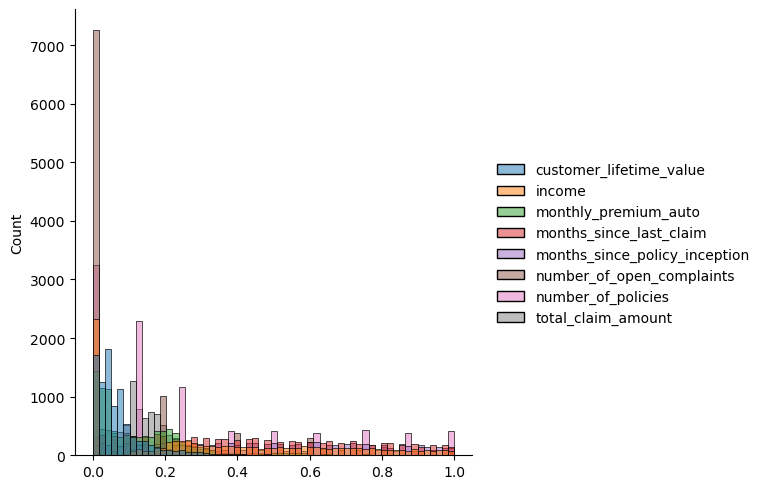

In [21]:
# What if we plot it?
sns.displot(num_norm)

### Preprocessing

#### One-Hot Encoding with Get_dummies

In [22]:
X_dumm = pd.get_dummies(X_cat, drop_first=False) # You can put X, not separating variables is needed.
X_dumm

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,coverage_Basic,coverage_Extended,coverage_Premium,...,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,1,0,0,0,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
9130,0,1,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
9131,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
9132,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


#### Concat

In [23]:
# Concat (One-Hot encoder)
X_concat = pd.concat([X_num, X_dumm], axis=1)
X_concat.sample(5)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state_Arizona,state_California,...,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
824,8547.586142,51179,71,10,25,0,2,466.176731,0,1,...,0,1,0,0,0,0,0,0,0,1
746,15147.930550,41082,63,23,94,0,2,106.647493,0,1,...,1,0,0,0,0,0,1,0,1,0
8351,3497.483075,63189,88,16,95,0,1,569.124597,0,1,...,0,1,0,0,0,0,0,0,1,0
2278,15144.409540,0,62,6,44,1,2,307.649586,0,0,...,0,0,0,0,0,0,1,0,1,0
1581,8875.965501,69205,110,20,56,0,6,372.362565,0,0,...,1,1,0,0,0,0,0,0,1,0


### Linear Regression

#### Train-Test Split

In [24]:
# We define train and test for X and Y
X_train, X_test, y_train, y_test = train_test_split(X_dumm, Y, test_size=0.3, random_state=42) 
# test_size = We give 30% for testing and 70% for testing
# random_state = it'll improve the model to divide always the model in the same way

In [25]:
len(X_dumm)*0.7 # Len before the test

6393.799999999999

In [26]:
len(X_test) # Len after the test

2741

#### Applying Linear Regression

In [27]:
model = LinearRegression() # We have the model
model.fit(X_train,y_train) # We fit the training data into the model

LinearRegression()

### Model Validation

In [28]:
predictions = model.predict(X_test)

In [29]:
predictions # An array of predictions

array([214.5, 432.5, 437.5, ..., 657. ,  99. , 582. ])

In [30]:
y_test # An arrawy of the data from our target

708     218.598065
47      447.793440
3995    451.200000
1513    355.641958
3686    470.097411
           ...    
4271    518.400000
7923    650.521790
5633    652.800000
8432    150.878447
681     452.616872
Name: total_claim_amount, Length: 2741, dtype: float64

#### r2, RMSE and MSE

In [31]:
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(0.7435590457853245, 144.68717964478077, 20934.37995356106)

In [37]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)

# ~ Ty Andre for this ! #https://stackoverflow.com/questions/51023806/how-to-get-adjusted-r-square-for-linear-regression
adj_r2 = (1 - (1 - r2) * ((X_concat.shape[0] - 1) / 
          (X_concat.shape[0] - X_concat.shape[1] - 1)))
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)
print("Adj r2 = ", adj_r2)

r2 =  0.7435590457853245
RMSE =  144.68717964478077
MSE =  20934.37995356106
Adj r2 =  0.7417208607363661


In [38]:
# r2 = Kind of good, it is closer to 1
# RMSE = It's 114. We will compare it with our target:
data['total_claim_amount'].describe()

count    9134.000000
mean      434.088794
std       290.500092
min         0.099007
25%       272.258244
50%       383.945434
75%       547.514839
max      2893.239678
Name: total_claim_amount, dtype: float64